# Introduction to Regression with Neural Networks in TensorFlow

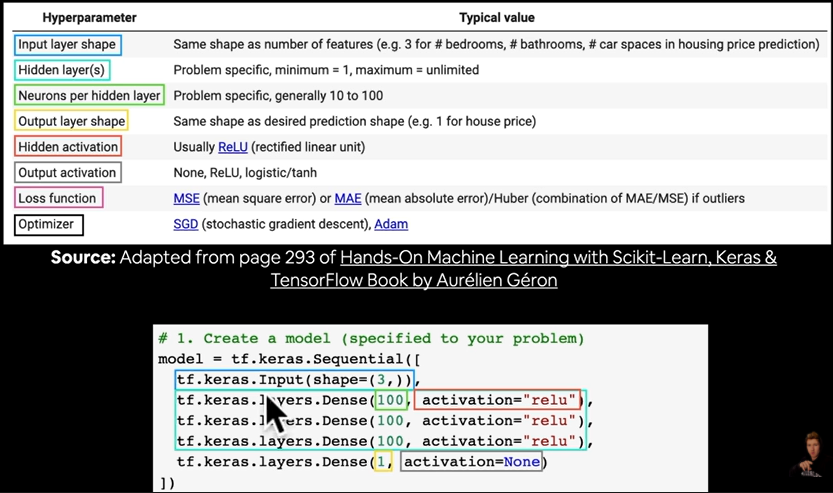

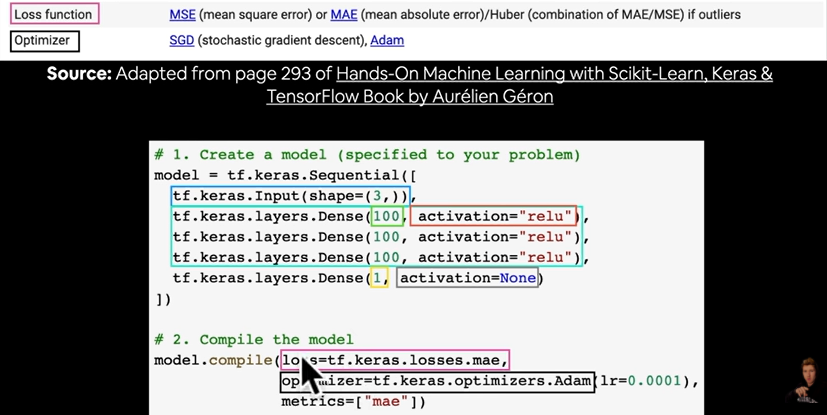

Loss function = measures the error of the prediction

Optimizer = describes how to improve to reduce the loss function

In [ ]:
import tensorflow as tf

## Creating Data to View and Fit

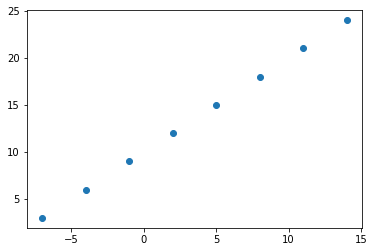

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize

plt.scatter(X, y);

## Input and Output Shapes

In [ ]:
# Create a demo tensor for housing price prediction

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# Turn numpy arrays to tensors

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

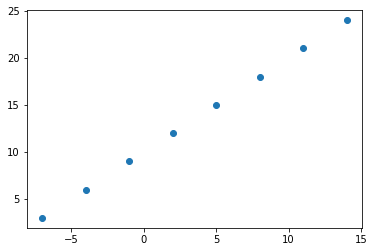

In [ ]:
plt.scatter(X, y);

## Modelling Steps

1. Creating a model - define input, output, and hidden layers.
2. Compile the model - define loss function, optimizer, evaluation metrics.
3. Fit the model - let the model try to find features between X and y

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`. 

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # stochasitc gradient descent
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 535ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try to make a prediction
# The loss during .fit indicates that the prediction would not be accurate

model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving Model

Can be done by altering the steps during model creation.

1. Creating a model - add more layers, increase the number of hidden units, change the activation function.
2. Compiling a model - change the optimization function or the learning rate.
3. Fitting a model - increase epochs (longer training) or number of data (give more data examples for the model to learn)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model with increased epoch
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 340ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# Try to predict again

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# The expected output is 27 was 12
# We can see a small improvement after altering the epochs

model.predict([17.0])

array([[30.158512]], dtype=float32)

In [ ]:
# Try to improve the model further

# 1. Create a model with added hidden layer
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation = 'relu'),
                             tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss = 'mae',
              optimizer = 'sgd',
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 434ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.2859 - mae: 13.2859
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6279 - mae: 12.6279
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.9702 - mae: 11.9702
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3044 - mae: 11.3044
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6244 - mae: 10.6244
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.9248 - mae: 9.9248
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.1949 - mae: 9.1949
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.4303 - mae: 8.4303
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.6245 - mae: 7.6245
Epoch 11/100
1/1 [==============================] - 0s 7ms/step 

In [ ]:
# Try to predict again
# Judging by the loss and mae the model should've predicted better than before
# This indicates a possibility of overfitting

model.predict([17.0])

array([[31.941307]], dtype=float32)

In [ ]:
model.predict([15.0])

array([[28.305435]], dtype=float32)

In [ ]:
# Try to improve the model further

# 1. Create a model with added hidden layer
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation = 'relu'),
                             tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss = 'mae',
              optimizer = 'adam',
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 431ms/step - loss: 14.0407 - mae: 14.0407
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 13.9553 - mae: 13.9553
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.8701 - mae: 13.8701
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 13.7849 - mae: 13.7849
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 13.6997 - mae: 13.6997
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 13.6147 - mae: 13.6147
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 13.5298 - mae: 13.5298
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 13.4451 - mae: 13.4451
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 13.3605 - mae: 13.3605
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2761 - mae: 13.2761
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
model.predict([17.0])

array([[22.091452]], dtype=float32)

In [ ]:
# Try to improve the model further

# 1. Create a model with added hidden layer
model = tf.keras.Sequential([tf.keras.layers.Dense(50, activation = None), # try without activation
                             tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(lr = 0.01), # increase learning rate to 0.01 default was 0.001
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 432ms/step - loss: 13.3252 - mae: 13.3252
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.6189 - mae: 12.6189
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.9164 - mae: 11.9164
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2153 - mae: 11.2153
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5129 - mae: 10.5129
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.8064 - mae: 9.8064
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0930 - mae: 9.0930
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.3699 - mae: 8.3699
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.6340 - mae: 7.6340
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8821 - mae: 6.8821
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - l

In [ ]:
# Try to predict again

model.predict([17.0])

array([[27.324867]], dtype=float32)

## Evaluating A Model

Visualizing (data, model, training of a model, predictions of a model) helps evaluating a model

In [ ]:
# Make a bigger dataset

tf.random.set_seed(42)
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

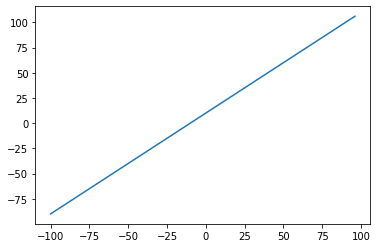

In [ ]:
# Visualize the data

import matplotlib.pyplot as plt

plt.plot(X, y);

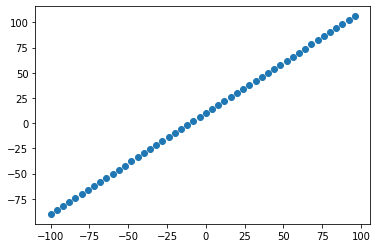

In [ ]:
plt.scatter(X, y);

## Split Into Train/Test

* **Training set** - the model learns from this data. Typically consists of 70-80% of the total data.

* **Validation set** - the model gets tuned on this data. Typically consists 10-15% of the total data.

* **Test set** - the model gets evaluated on this data to test what it has learned.Typically consists 10-15% of the total data available.

In [ ]:
# Check the length of samples

len(X)

50

In [ ]:
# Train test split

X_train = X[:40] # 80% of the data which is 40 out of 50
y_train = y[:40]

X_test = X[40:] # 20% of the data which is the last 10 data
y_test = y[40:]

# Check length to make sure it's correct
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing The Data

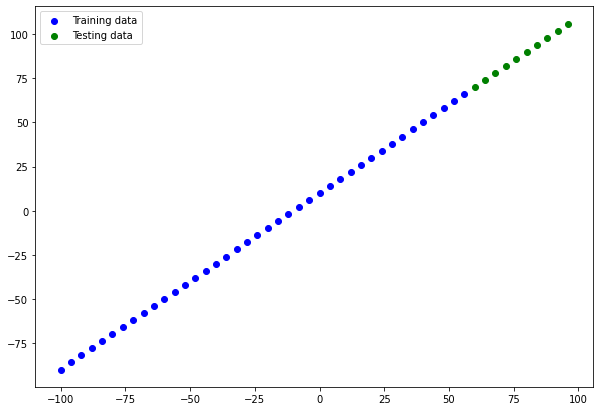

In [ ]:
plt.figure(figsize = (10, 7))

plt.scatter(X_train, y_train, c = 'b', label = 'Training data')
plt.scatter(X_test, y_test, c = 'g', label = 'Testing data')
plt.legend();

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model with increased epoch
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - l

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape = [1])])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params: number of parameters in the model.
* Trainable params: number of parameters the model can update as it trains.
* Non-trainable params: number of parameters that aren't updated during training.

In [ ]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 10ms/step -

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


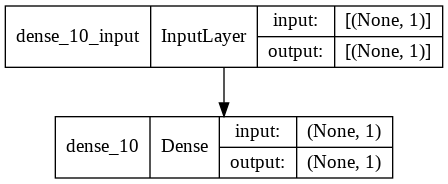

In [ ]:
# You can also view 2D plot of the model

from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing Model Predictions

In [ ]:
# Make predictions

y_pred = model.predict(X_test)
y_pred

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Create plotting function so we can reuse it

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  
  """
  Plots training and testing data and compares prediction with actual data
  """
  plt.figure(figsize = (10, 7))
  # Training data
  plt.scatter(train_data, train_labels, c = 'b', label = 'Training data')
  # Test data
  plt.scatter(test_data, test_labels, c = 'g', label = 'Testing data')
  # Prediction
  plt.scatter(test_data, predictions, c = 'r', label = 'Predictions')
  # Show legend
  plt.legend();

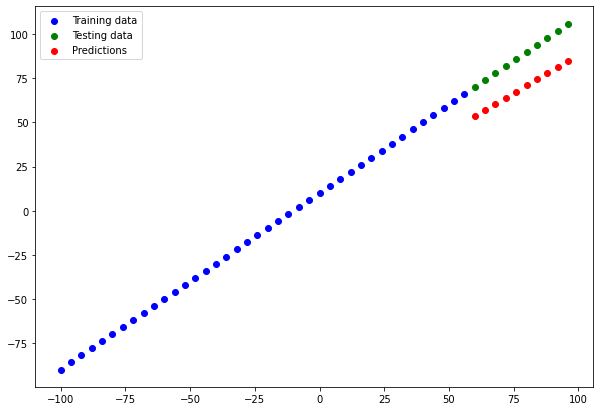

In [ ]:
# The red plot shows how far the prediction to the true values

plot_predictions()

## Evaluating Predictions

Two common metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The goal is to get the smallest of either values possible.

In [ ]:
# Evaluate the model on the test set
# You can use .evaluate to return loss and metrics values
# Metrics values returned depends on the metrics used during the modelling
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 142ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [ ]:
# Evaluate using tensorflow built-in function
# The expected output should be a single MAE values
# It happens because y_test and y_preds have different shapes

mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
y_pred

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [ ]:
# Use .squeeze() to remove dimension shape of 1
# https://www.tensorflow.org/api_docs/python/tf/squeeze

y_pred.shape

(10, 1)

In [ ]:
y_pred.squeeze().shape

(10,)

In [ ]:
y_test, y_pred.squeeze()

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32))

In [ ]:
# Calcuate MAE

mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred.squeeze()) # squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [ ]:
# Calcuate MSE

mse = tf.metrics.mean_squared_error(y_true=y_test, 
                                     y_pred=y_pred.squeeze()) # squeeze() to make same shape
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [ ]:
tf.reduce_mean(tf.abs(y_test-y_pred.squeeze()))

<tf.Tensor: shape=(), dtype=int32, numpy=19>

In [ ]:
# Make functions for metrics

def mae(y_test, y_pred):
  """
  Calculuates MAE between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred = tf.squeeze(y_pred))
  
def mse(y_test, y_pred):
  """
  Calculates MSE between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred = tf.squeeze(y_pred))

## Experimenting on The Data

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

In reality, number 1 can't always be done in a real-world dataset. So we will demonstrate number 2 and 3.

We're going to make 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

### Model 1

Model with 1 layer and 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

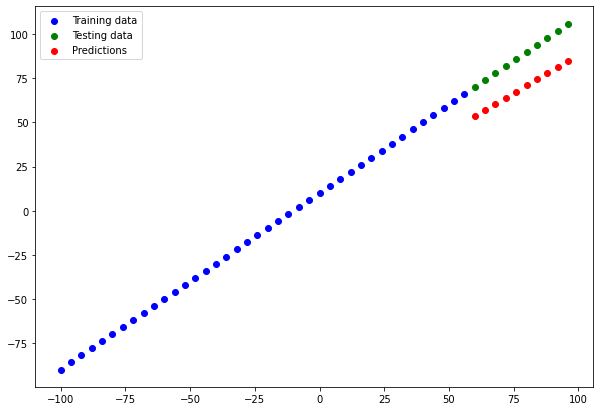

In [ ]:
# Make and plot predictions for model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [80]:
# Evaluate model_1

mae_1 = mae(y_test, y_preds_1).numpy()
mse_1 = mse(y_test, y_preds_1).numpy()
mae_1, mse_1

(18.745327, 353.57336)

### Model 2

The same as Model 1 but with added layer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0s 5ms/s

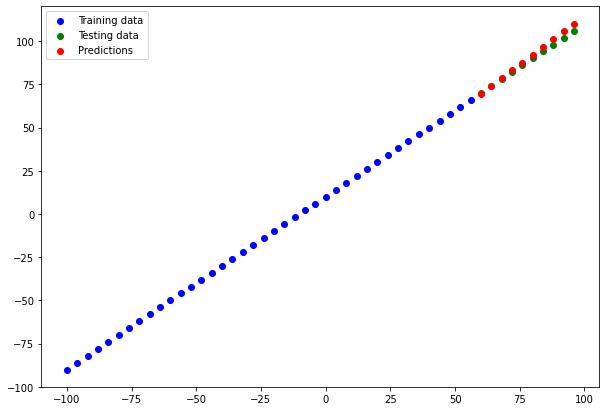

In [ ]:
# Make and plot predictions for model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [79]:
# Evaluate model_2

mae_2 = mae(y_test, y_preds_2).numpy()
mse_2 = mse(y_test, y_preds_2).numpy()
mae_2, mse_2

(1.9098114, 5.459232)

### Model 3

Same as before but with 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model with 500 epochs
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500) # set verbose to 0 for less output

Epoch 1/500
2/2 [==============================] - 1s 8ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/500
2/2 [==============================] - 0s 5ms/st

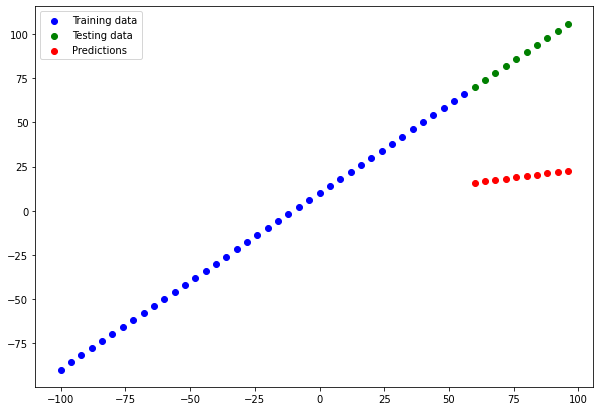

In [ ]:
# Make and plot predictions for model_3

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

Increasing epoch != better predictions

Too many epochs may cause overfitting, while too few epochs may cause undefitting. Try to find the best value by trial and error.

In [78]:
# Evaluate model_3

mae_3 = mae(y_test, y_preds_3).numpy()
mse_3 = mse(y_test, y_preds_3).numpy()
mae_3, mse_3

(68.68786, 4804.4717)

## Comparing Results

In [81]:
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,68.687859


From the results we can see that model_2 performs the best. By comparing our models performance, we can determine which model performs the best and we can also plan on how he may further improve our models by creating another with different hyperparameters.

## Save A Model

We can use TensorFlow `.model.save()` to save our model.

https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model

Models can be saved in two format:

1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [82]:
# Save a model using the SavedModel

model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [83]:
# Save a model using the HDF5 format

model_2.save("best_model_HDF5_format.h5")

## Load A Model

Can be done by using `.load_model()`
https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model


In [84]:
# Load a model from the SavedModel format

loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Compare model_2 with the SavedModel version
# Expected output is true if the model is correct

model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [86]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Compare model_2 with the loaded HDF5 version
# Expected output is true if the model is correct

h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

## Downloading Model

In [ ]:
# Download the model (or any file) from Google Colab to local device

from google.colab import files
files.download("best_model_HDF5_format.h5")

# Project Example

We are going to use the medical cost dataset which can be acquired from either links below:
* https://www.kaggle.com/mirichoi0218/insurance
* https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

Columns

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance



In [88]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Encoding

Feature encoding applied to column `sex`, `smoker`, and `region` using Pandas' `.get_dummies()`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [90]:
# Encoding categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [91]:
# Split into features (X) and labels (y) with charges as target labels

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

Split data into train and test

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42) # set seed so it will always split into the same group of data

Try using the same model as previous model 2

In [95]:
# Set random seed
tf.random.set_seed(42)

# Create a new model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7859.4346 - mae: 7859.4346
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7578.0850 - mae: 7578.0850
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7514.6177 - mae: 7514.6177
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7694.1338 - mae: 7694.1338
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.9136 - mae: 7595.9136
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7735.9116 - mae: 7735.9116

In [96]:
# Evaluate the insurance model

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8628.2393 - mae: 8628.2393


[8628.2392578125, 8628.2392578125]

Try the model again with added layers and units (100 for 1st layer, 10 for 2nd layer, and 1 for output layer) and using the Adam optimizer

In [97]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units

insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit
])

# Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics = ['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

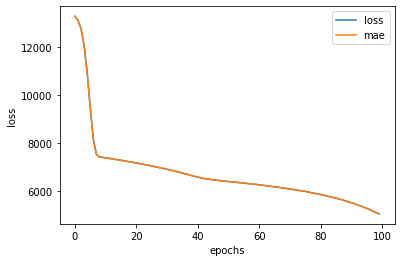

In [98]:
# Plot loss curve

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

The graph above indicates that the MAE and loss kept decreasing as the epoch increases. We may get better results if we train the model for bigger epochs.

We can try to train the model with large epochs and use the EarlyStopping function so the model will automatically stop training if there's no significant improvement.
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [99]:
# Try train the model again with 100 more epochs

history_2 = insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 4989.4751 - mae: 4989.4751
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 4914.9385 - mae: 4914.9385
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 4841.3486 - mae: 4841.3486
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 4761.7690 - mae: 4761.7690
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 4682.7056 - mae: 4682.7056
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 4603.9321 - mae: 4603.9321
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 4509.5996 - mae: 4509.5996
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 4419.8447 - mae: 4419.8447
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 4347.3984 - mae: 4347.3984
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 4253.3608 - mae: 4253.3608

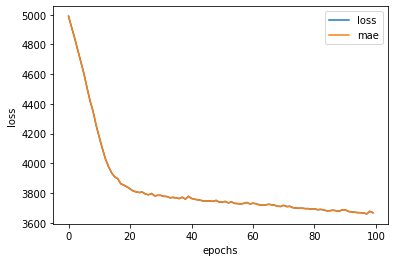

In [100]:
# Plot loss curve

pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

## Preprocessing Data (normalization and standardization)

Other than feature encoding, there is also a method called feature scaling. This method is used to scale the data into the same range. 

* Normalization: scaling all values into the range of 0 to 1. Can be performed using Sklearn's [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
* Standardization: converts all of your data to unit variance and 0 mean. Can be performed using Sklearn's [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

Usually neural networks prefers normalization.


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We can use Sklearn's [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) to make a multi-step data preprocessing functions.

We will use MinMaxScaler for the feature scaling method and OneHotEncoder for the feature encodingmethod.

In [104]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer

ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),
                             (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"]) # ignore means the function will ignore features that aren't encodable
)

# Split into features (X) and labels (y) with charges as target labels

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit transformer only on the train set. Fitting on test set causes data leakage

ct.fit(X_train)

# Transform the training and test data

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [105]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [107]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Try create a model

In [108]:
# Set seed

tf.random.set_seed(42)

# Create model

insurance_model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)])

# Compile the model

insurance_model_3.compile(loss = 'mae',
                          optimizer = 'adam',
                          metrics = ['mae'])

# Fit the model

insurance_model_3.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [111]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5774 - mae: 3171.5774


[3171.577392578125, 3171.577392578125]

In [112]:
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 15088.6670 - mae: 15088.6670


[15088.6669921875, 15088.6669921875]

When we compared our model 3 with model 2, we've made significant improvement on the model's performance.